In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
#(if you donot put encoding= "ISO-8859-1" then unicode encoding error will appear)

In [16]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4130,ham,\Its Ur luck to Love someone. Its Ur fortune t...,its a miracle to Love a person who can't Love...,NaN,NaN
981,ham,Reckon need to be in town by eightish to walk ...,NaN,NaN,NaN
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...,NaN,NaN,NaN
3968,ham,Thanks for your message. I really appreciate y...,NaN,NaN,NaN
4959,ham,I want &lt;#&gt; rs da:)do you have it?,NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [7]:
#Steps Followed :
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements based on Evaluation
#7. Website
#8. Deploy

# 1.Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
#drop last 3 coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [21]:
df.sample(5)

,v1,v2
2046,ham,"Aight fuck it, I'll get it later"
1806,spam,Todays Voda numbers ending 1225 are selected t...
1938,ham,Excellent! Are you ready to moan and scream in...
1493,ham,How are you with moneY...as in to you...money ...
182,ham,ok. I am a gentleman and will treat you with d...


In [25]:
# renaming the cols
df.rename(columns={'v1' : 'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
975,ham,Hey no I ad a crap nite was borin without ya 2...
5322,ham,"Thanks, I'll keep that in mind"
1548,ham,"Me, i dont know again oh"
4911,ham,I am on the way to tirupur.
1683,ham,Already am squatting is the new way of walking


In [27]:
#label encoder just converts the categorical data which is nominal in nature into numerical data and 
#we cannot decide which parameter ill be 0 or 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df['target'] = encoder.fit_transform(df['target'])

In [32]:
df.sample(5)

,target,text
4575,1,Congratulations ur awarded 500 of CD vouchers ...
5278,1,URGENT! Your Mobile number has been awarded wi...
1491,1,Your account has been credited with 500 FREE T...
3817,1,74355 XMAS iscoming & ur awarded either å£500 ...
3815,0,How long does it take to get it.


In [33]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [35]:
#check for duplicated values
df.duplicated().sum()

403

In [40]:
#Remove duplicated values : when you use drop_duplicates(keep=False), If your subset is just a single column like A , 
#the keep=False will remove all rows. If you define keep as first or last , you will keep at least one record from all.
df = df.drop_duplicates(keep='first')

In [41]:
df.duplicated().sum()

0

In [42]:
df.shape

(5169, 2)

In [43]:
df.sample(5)

,target,text
3781,0,How r Ì_ going to send it to me?
1191,0,Come to my home for one last time i wont do an...
1617,0,Did u download the fring app?
4080,0,Hurry home. Soup is DONE!
3803,0,"No dude, its not fake..my frnds got money, tht..."


# 2.EDA

In [ ]:
#firstly i'll check kitna ham hai kitna spam hai

In [44]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

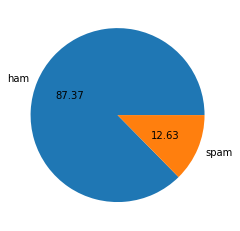

In [47]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct ="%0.2f")
plt.show()

In [48]:
#this showsthat our data has a slight imbalance because 88% data is Ham and only about 12% is spam

In [49]:
#We will analyze the sms , see there are how many sentences , words etc are used.

In [50]:
import nltk

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
#For deeper analysis we will make 3 more rows (a) For character in the sms (b)no. of words in the sms 
#(C)no. of sentences in the sms.

In [54]:
df['num_charcaters'] = df['text'].apply(len)

In [55]:
df.head()

,target,text,num_charcaters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
#num of words 
#lamda ka jo x hai voh input hai and len(...) hai voh output hai, voh return hoga
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [58]:
df.head()

,target,text,num_charcaters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [59]:
#num of sentences 
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [60]:
df.head()

,target,text,num_charcaters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
df.columns

Index(['target', 'text', 'num_charcaters', 'num_words', 'num_sentences'], dtype='object')

In [62]:
df[['num_charcaters', 'num_words', 'num_sentences']].describe()

,num_charcaters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [63]:
#ham
df[df['target'] == 0][['num_charcaters', 'num_words', 'num_sentences']].describe()

,num_charcaters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [64]:
#spam
df[df['target'] == 1][['num_charcaters', 'num_words', 'num_sentences']].describe()

,num_charcaters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [68]:
import seaborn as sns

<AxesSubplot:xlabel='num_charcaters', ylabel='Count'>

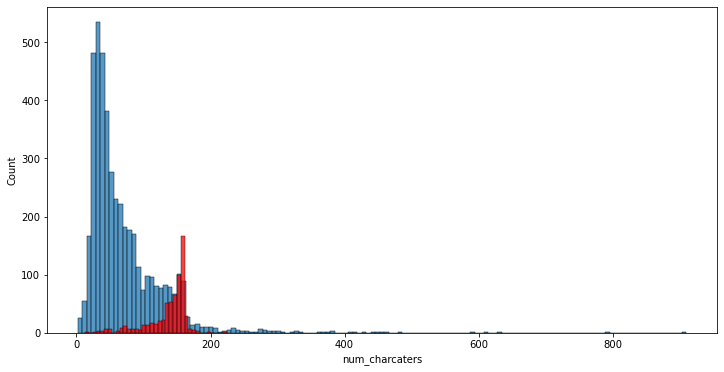

In [74]:
#https://www.w3schools.com/python/matplotlib_histograms.asp
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charcaters'],bins=30)
sns.histplot(df[df['target'] == 1]['num_charcaters'],color='red',bins=30)

<AxesSubplot:xlabel='num_words', ylabel='Count'>

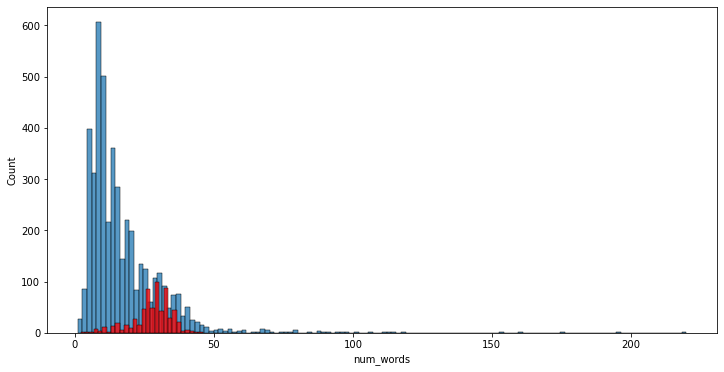

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

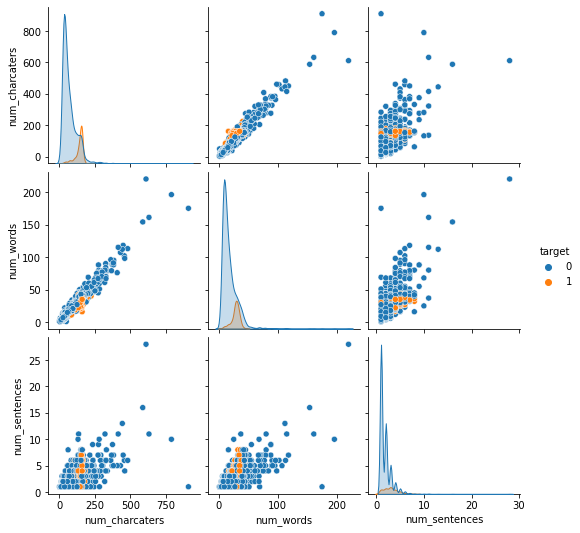

In [76]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

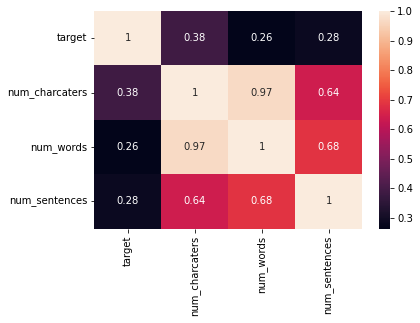

In [78]:
sns.heatmap(df.corr(), annot = True)

# 3.Data Preprocessing
   - Lower Case
   - Tokenization
   - Removing Special Characters
   - Removing stop words and punctuation
   - stemming

In [91]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
string.punctuation


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum() :
            y.append(i)
    
    #you cannot copy list like text = y because list ko clone karna padega like below
    text = y[:] 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df['transformed_text']=df['text'].apply(transform_text)

In [93]:
df.head()

,target,text,num_charcaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:
!pip install wordcloud

In [111]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size=10,background_color='white')

In [112]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

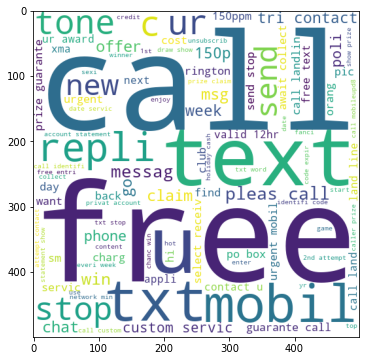

In [114]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [116]:
#these words in the images are thoese words that are spam

In [117]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

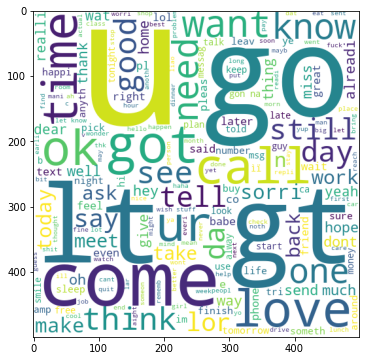

In [118]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [119]:
df.head()

,target,text,num_charcaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [120]:
#extracting top 50 words used in ham messages

In [123]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [124]:
len(spam_corpus)

9939

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


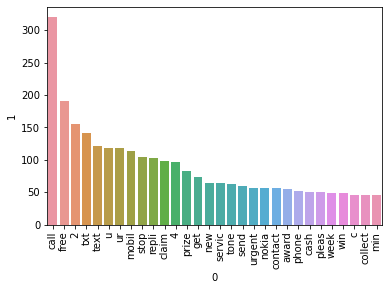

In [128]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [129]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [130]:
len(ham_corpus)

35394

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


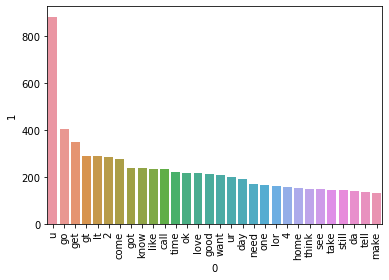

In [131]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [132]:
#generally for textualy dataset we use Naive bayes it is said to have a good performance

In [133]:
#machine learning meh input is alays needed in numerical form so we will connvert it into a vector
#3 ways to do this :
# 1)Bag of words
# 2)TFIDF
# 3)word2vec

In [195]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [161]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

#yahapar jo array milta hai voh sparse hota hai so to convert it into ense we use toarray()

In [162]:
X.shape

(5169, 6708)

In [163]:
y = df['target'].values

In [164]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [167]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [168]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [169]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))
#precision matters here more than accuracy because imbalanced data hai

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [170]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [171]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [172]:
#tfidf with mnb we have selected because it has great precision

In [177]:
!pip install xgboost

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [180]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state =2)
abc = AdaBoostClassifier(n_estimators=50,random_state =2)
bc = BaggingClassifier(n_estimators=50,random_state =2)
etc = ExtraTreesClassifier(n_estimators=50,random_state =2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state =2)
xgb = XGBClassifier(n_estimators=50,random_state =2)


In [182]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
    'xgb' : xgb       
}

In [183]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [184]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [185]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [188]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [189]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [190]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [191]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


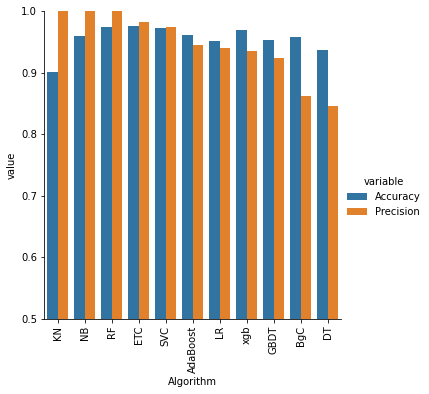

In [192]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improve
#1. Change the max_features parameters of TfIdf

In [197]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [198]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [199]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [200]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [201]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [202]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,ETC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
7,xgb,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [203]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [205]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)])

In [206]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [212]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 1.0


In [208]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [209]:
from sklearn.ensemble import StackingClassifier

In [210]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [211]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [214]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))